gesamtanzahl = 11, validierungsanzahl = 5
tensor([9, 0, 5, 6, 3, 7])
tensor([ 4, 10,  2,  1,  8])
Epoch 1, Loss 83.053200, val-Loss 30.317467
Epoch 500, Loss 4.880975, val-Loss 5.014568
Epoch 1000, Loss 2.696007, val-Loss 3.810544
Epoch 1500, Loss 2.575149, val-Loss 3.567857
Epoch 2000, Loss 2.568465, val-Loss 3.513025
Epoch 2500, Loss 2.568095, val-Loss 3.500254
Epoch 3000, Loss 2.568074, val-Loss 3.497260
Epoch 3500, Loss 2.568073, val-Loss 3.496568
Epoch 4000, Loss 2.568073, val-Loss 3.496444
Epoch 4500, Loss 2.568073, val-Loss 3.496444
Epoch 5000, Loss 2.568073, val-Loss 3.496444


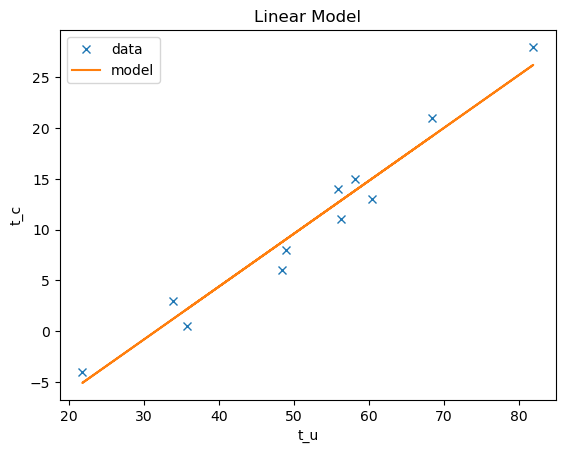

In [2]:
import torch.optim as optim
dir(optim)

import numpy as np
import matplotlib.pyplot as plt 
import torch
values = np.loadtxt('vl5_data.csv')

t_u = torch.tensor(values[:,1])
t_c =torch.tensor(values[:,0])
#plt.plot(values[:,1], values[:,0], 'x')

t_un = 0.1 * t_u
def model(t_u,w,b):
    return w*t_u+b

def loss_fn(t_p, t_c):
    sq_diff = (t_p-t_c)**2
    return sq_diff.mean()


n_samples = t_u.shape[0]
n_val = int(0.5 * n_samples)
print(f'gesamtanzahl = {n_samples}, validierungsanzahl = {n_val}')

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
print(train_indices)
print(val_indices)

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u


def training_loop(n_epochs, optimizer, train_t_u, train_t_c, val_t_u, val_t_c):
    loss_1 = np.zeros(n_epochs)
    epoch_1 = np.zeros(n_epochs)
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        loss = loss_fn(train_t_p, train_t_c)
        # with torch.no_grad():
        #     params -= learning_rate * params.grad
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_1[epoch-1] = loss
        epoch_1[epoch-1] = epoch
        if epoch % 500 == 0 or epoch == 1:
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            print('Epoch %d, Loss %f, val-Loss %f' % (epoch, float(loss), float(val_loss)))
    return params, loss_1, epoch_1




learning_rate = 1e-2
params = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()

# params = torch.tensor([1.0, 0.0], requires_grad=True)
params, loss1, epoch1 = training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    train_t_u = train_t_un, 
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)
plt.plot(t_u,t_c,'x')
t_p = model(t_un, params[0], params[1])
plt.plot(t_u.detach().numpy(),t_p.detach().numpy())
plt.xlabel('t_u')
plt.ylabel('t_c')
plt.title('Linear Model')
plt.legend(['data', 'model'])
plt.show()




gesamtanzahl = 11, validierungsanzahl = 5
tensor([ 2, 10,  8,  6,  9,  3])
tensor([1, 0, 4, 5, 7])
Epoch 1, Loss 277.333333, val-Loss 74.866336
Epoch 500, Loss 3.563606, val-Loss 11.188702
Epoch 1000, Loss 2.504214, val-Loss 6.826803
Epoch 1500, Loss 2.387980, val-Loss 5.564128
Epoch 2000, Loss 2.382578, val-Loss 5.313285
Epoch 2500, Loss 2.380380, val-Loss 5.246392
Epoch 3000, Loss 2.377707, val-Loss 5.185770
Epoch 3500, Loss 2.374504, val-Loss 5.111678
Epoch 4000, Loss 2.370780, val-Loss 5.021862
Epoch 4500, Loss 2.366598, val-Loss 4.915290
Epoch 5000, Loss 2.362094, val-Loss 4.791939


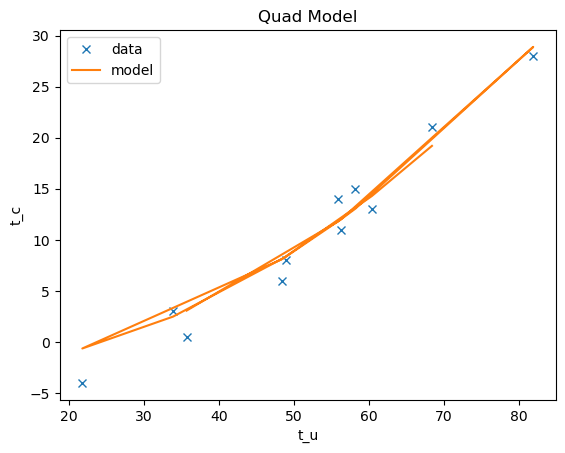

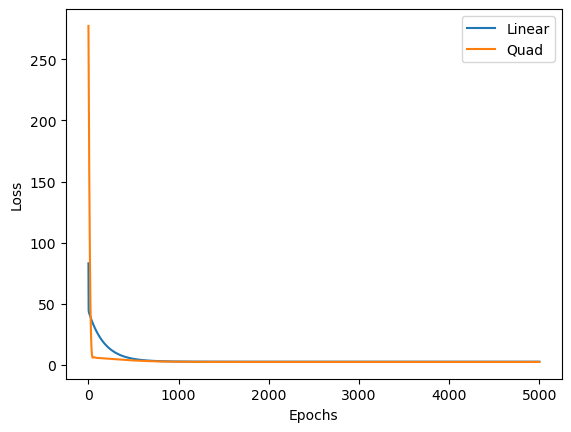

In [3]:
# neues Modell

def model2(t_u,w1,w2,b):
    return w2*t_u**2+w1*t_u+b

def training_loop2(n_epochs, optimizer, train_t_u, train_t_c, val_t_u, val_t_c):
    loss_2 = np.zeros(n_epochs)
    epoch_2 = np.zeros(n_epochs)
    for epoch in range(1, n_epochs + 1):
        train_t_p = model2(train_t_u, *params)
        loss = loss_fn(train_t_p, train_t_c)
        # with torch.no_grad():
        #     params -= learning_rate * params.grad
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_2[epoch-1] = loss
        epoch_2[epoch-1] = epoch
        if epoch % 500 == 0 or epoch == 1:
            val_t_p = model2(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            print('Epoch %d, Loss %f, val-Loss %f' % (epoch, float(loss), float(val_loss)))
    return params, loss_2, epoch_2

n_samples = t_u.shape[0]
n_val = int(0.5 * n_samples)
print(f'gesamtanzahl = {n_samples}, validierungsanzahl = {n_val}')

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
print(train_indices)
print(val_indices)

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u


learning_rate = 1e-2
params = torch.tensor([0.0,0.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=learning_rate)

t_p = model2(t_u, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()

# params = torch.tensor([1.0, 0.0], requires_grad=True)
params, loss2, epoch2 = training_loop2(
    n_epochs = 5000, 
    optimizer = optimizer,
    train_t_u = train_t_un, 
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)



plt.plot(t_u,t_c,'x')
t_p = model2(t_un, params[0], params[1], params[2])
plt.plot(t_u.detach().numpy(),t_p.detach().numpy())
plt.xlabel('t_u')
plt.ylabel('t_c')
plt.title('Quad Model')
plt.legend(['data', 'model'])
plt.show()



plt.plot(epoch1, loss1)
plt.plot(epoch1, loss2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Linear', 'Quad'])
plt.show()

Der Loss der zweiten Modells ist minimal kleiner, als der des ersten Modells, jedoch lässt sich nicht sagen, dass das Ergebnis mit dem zweiten Modell besser aussieht.